In [2]:
from google.colab import drive
drive.mount('/content/gdrive')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


#**Data Understanding & Preparation**

In [0]:
train = pd.read_csv ('/content/gdrive/My Drive/ashrae-energy-prediction/train.csv')
train.head(10)

,building_id,meter,timestamp,meter_reading
0,0,0,2016-01-01 00:00:00,0.0
1,1,0,2016-01-01 00:00:00,0.0
2,2,0,2016-01-01 00:00:00,0.0
3,3,0,2016-01-01 00:00:00,0.0
4,4,0,2016-01-01 00:00:00,0.0
5,5,0,2016-01-01 00:00:00,0.0
6,6,0,2016-01-01 00:00:00,0.0
7,7,0,2016-01-01 00:00:00,0.0
8,8,0,2016-01-01 00:00:00,0.0
9,9,0,2016-01-01 00:00:00,0.0


In [0]:
train.tail(10)

,building_id,meter,timestamp,meter_reading
20216090,1440,0,2016-12-31 23:00:00,154.7500
20216091,1441,0,2016-12-31 23:00:00,242.9250
20216092,1442,0,2016-12-31 23:00:00,59.4000
20216093,1442,2,2016-12-31 23:00:00,55.6241
20216094,1443,0,2016-12-31 23:00:00,64.9500
20216095,1444,0,2016-12-31 23:00:00,8.7500
20216096,1445,0,2016-12-31 23:00:00,4.8250
20216097,1446,0,2016-12-31 23:00:00,0.0000
20216098,1447,0,2016-12-31 23:00:00,159.5750
20216099,1448,0,2016-12-31 23:00:00,2.8500


In [0]:
train.shape

(20216100, 4)

In [0]:
building_metadata = pd.read_csv ('/content/gdrive/My Drive/ashrae-energy-prediction/building_metadata.csv')

In [0]:
building_metadata.head(10)

,site_id,building_id,primary_use,square_feet,year_built,floor_count
0,0,0,Education,7432,2008.0,NaN
1,0,1,Education,2720,2004.0,NaN
2,0,2,Education,5376,1991.0,NaN
3,0,3,Education,23685,2002.0,NaN
4,0,4,Education,116607,1975.0,NaN
5,0,5,Education,8000,2000.0,NaN
6,0,6,Lodging/residential,27926,1981.0,NaN
7,0,7,Education,121074,1989.0,NaN
8,0,8,Education,60809,2003.0,NaN
9,0,9,Office,27000,2010.0,NaN


In [0]:
building_metadata.shape

(1449, 6)

In [0]:
weather_train = pd.read_csv ('/content/gdrive/My Drive/ashrae-energy-prediction/weather_train.csv')

In [0]:
weather_train.head(10)

,site_id,timestamp,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,0,2016-01-01 00:00:00,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
1,0,2016-01-01 01:00:00,24.4,NaN,21.1,-1.0,1020.2,70.0,1.5
2,0,2016-01-01 02:00:00,22.8,2.0,21.1,0.0,1020.2,0.0,0.0
3,0,2016-01-01 03:00:00,21.1,2.0,20.6,0.0,1020.1,0.0,0.0
4,0,2016-01-01 04:00:00,20.0,2.0,20.0,-1.0,1020.0,250.0,2.6
5,0,2016-01-01 05:00:00,19.4,NaN,19.4,0.0,NaN,0.0,0.0
6,0,2016-01-01 06:00:00,21.1,6.0,21.1,-1.0,1019.4,0.0,0.0
7,0,2016-01-01 07:00:00,21.1,NaN,21.1,0.0,1018.8,210.0,1.5
8,0,2016-01-01 08:00:00,20.6,NaN,20.0,0.0,1018.1,0.0,0.0
9,0,2016-01-01 09:00:00,21.1,NaN,20.6,0.0,1019.0,290.0,1.5


In [0]:
weather_train.shape

(139773, 9)

In [0]:
building_metadata.tail(10)

,site_id,building_id,primary_use,square_feet,year_built,floor_count
1439,15,1439,Education,56497,1957.0,NaN
1440,15,1440,Lodging/residential,150294,1987.0,NaN
1441,15,1441,Education,30143,1951.0,NaN
1442,15,1442,Public services,99541,1993.0,NaN
1443,15,1443,Education,40311,1913.0,NaN
1444,15,1444,Entertainment/public assembly,19619,1914.0,NaN
1445,15,1445,Education,4298,NaN,NaN
1446,15,1446,Entertainment/public assembly,11265,1997.0,NaN
1447,15,1447,Lodging/residential,29775,2001.0,NaN
1448,15,1448,Office,92271,2001.0,NaN


In [0]:
building_metadata.isna().sum()

site_id           0
building_id       0
primary_use       0
square_feet       0
year_built      774
floor_count    1094
dtype: int64

**Delete 'year_built'  &  'floor_count'**

In [0]:
var = [x for x in building_metadata.columns if x not in ['year_built','floor_count']]
var
new_building_metadata = building_metadata[var]


In [0]:
new_building_metadata.primary_use.value_counts()

Education                        549
Office                           279
Entertainment/public assembly    184
Public services                  156
Lodging/residential              147
Other                             25
Healthcare                        23
Parking                           22
Warehouse/storage                 13
Manufacturing/industrial          12
Retail                            11
Services                          10
Technology/science                 6
Food sales and service             5
Utility                            4
Religious worship                  3
Name: primary_use, dtype: int64

In [0]:
weather_train.tail(10)

,site_id,timestamp,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
139763,15,2016-12-31 14:00:00,-2.8,NaN,-7.8,NaN,1013.4,170.0,5.7
139764,15,2016-12-31 15:00:00,-1.7,4.0,-7.2,NaN,1012.3,160.0,6.7
139765,15,2016-12-31 16:00:00,-0.6,0.0,-6.7,NaN,1011.1,170.0,7.2
139766,15,2016-12-31 17:00:00,2.2,NaN,-7.8,NaN,1009.1,180.0,7.7
139767,15,2016-12-31 18:00:00,2.8,NaN,-7.8,NaN,1007.7,180.0,8.2
139768,15,2016-12-31 19:00:00,3.0,NaN,-8.0,NaN,NaN,180.0,5.7
139769,15,2016-12-31 20:00:00,2.8,2.0,-8.9,NaN,1007.4,180.0,7.7
139770,15,2016-12-31 21:00:00,2.8,NaN,-7.2,NaN,1007.5,180.0,5.1
139771,15,2016-12-31 22:00:00,2.2,NaN,-6.7,NaN,1008.0,170.0,4.6
139772,15,2016-12-31 23:00:00,1.7,NaN,-5.6,-1.0,1008.5,180.0,8.8


In [0]:
weather_train.isna().sum()

site_id                   0
timestamp                 0
air_temperature          55
cloud_coverage        69173
dew_temperature         113
precip_depth_1_hr     50289
sea_level_pressure    10618
wind_direction         6268
wind_speed              304
dtype: int64

In [0]:
weather_train.shape

(139773, 9)

**Delete attributes with many missing values**

In [0]:
var = [x for x in weather_train.columns if x not in ['cloud_coverage','precip_depth_1_hr','sea_level_pressure','wind_direction']]
new_weather_train = weather_train[var]

In [0]:
new_weather_train.describe()

,site_id,air_temperature,dew_temperature,wind_speed
count,139773.000000,139718.000000,139660.000000,139469.000000
mean,7.478977,14.418106,7.350158,3.560527
std,4.604744,10.626595,9.790235,2.335874
min,0.000000,-28.900000,-35.000000,0.000000
25%,3.000000,7.200000,0.600000,2.100000
50%,7.000000,15.000000,8.300000,3.100000
75%,11.000000,22.200000,14.400000,5.000000
max,15.000000,47.200000,26.100000,19.000000


In [0]:
#replace missing values with median (wind_speed)
new_weather_train['wind_speed'].fillna(new_weather_train['wind_speed'].median(), inplace=True)
new_weather_train.isna().sum()

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


site_id              0
timestamp            0
air_temperature     55
dew_temperature    113
wind_speed           0
dtype: int64

In [0]:
#replace missing values with median ('air_temperature')

new_weather_train['air_temperature'].fillna(new_weather_train['air_temperature'].median(), inplace=True)
new_weather_train.isna().sum()

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


site_id              0
timestamp            0
air_temperature      0
dew_temperature    113
wind_speed           0
dtype: int64

In [0]:
#replace missing values with median ('dew_temperature')

new_weather_train['dew_temperature'].fillna(new_weather_train['dew_temperature'].median(), inplace=True)
new_weather_train.isna().sum()

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


site_id            0
timestamp          0
air_temperature    0
dew_temperature    0
wind_speed         0
dtype: int64

In [0]:
new_weather_train.head(10)

,site_id,timestamp,air_temperature,dew_temperature,wind_speed
0,0,2016-01-01 00:00:00,25.0,20.0,0.0
1,0,2016-01-01 01:00:00,24.4,21.1,1.5
2,0,2016-01-01 02:00:00,22.8,21.1,0.0
3,0,2016-01-01 03:00:00,21.1,20.6,0.0
4,0,2016-01-01 04:00:00,20.0,20.0,2.6
5,0,2016-01-01 05:00:00,19.4,19.4,0.0
6,0,2016-01-01 06:00:00,21.1,21.1,0.0
7,0,2016-01-01 07:00:00,21.1,21.1,1.5
8,0,2016-01-01 08:00:00,20.6,20.0,0.0
9,0,2016-01-01 09:00:00,21.1,20.6,1.5


In [0]:
train.isna().sum()

building_id      0
meter            0
timestamp        0
meter_reading    0
dtype: int64

In [0]:
train.head(14)

,building_id,meter,timestamp,meter_reading
0,0,0,2016-01-01 00:00:00,0.0
1,1,0,2016-01-01 00:00:00,0.0
2,2,0,2016-01-01 00:00:00,0.0
3,3,0,2016-01-01 00:00:00,0.0
4,4,0,2016-01-01 00:00:00,0.0
5,5,0,2016-01-01 00:00:00,0.0
6,6,0,2016-01-01 00:00:00,0.0
7,7,0,2016-01-01 00:00:00,0.0
8,8,0,2016-01-01 00:00:00,0.0
9,9,0,2016-01-01 00:00:00,0.0


In [0]:
new_building_metadata.head(10)

,site_id,building_id,primary_use,square_feet
0,0,0,Education,7432
1,0,1,Education,2720
2,0,2,Education,5376
3,0,3,Education,23685
4,0,4,Education,116607
5,0,5,Education,8000
6,0,6,Lodging/residential,27926
7,0,7,Education,121074
8,0,8,Education,60809
9,0,9,Office,27000


In [0]:
new_building_metadata.primary_use.value_counts()

Education                        549
Office                           279
Entertainment/public assembly    184
Public services                  156
Lodging/residential              147
Other                             25
Healthcare                        23
Parking                           22
Warehouse/storage                 13
Manufacturing/industrial          12
Retail                            11
Services                          10
Technology/science                 6
Food sales and service             5
Utility                            4
Religious worship                  3
Name: primary_use, dtype: int64

##**concatenate all attributes in one dataframe (train)**

In [0]:
new_building_metadata_building_id = new_building_metadata['building_id'].to_list()
train_building_id = train['building_id'].to_list()

In [0]:
new_building_metadata_square_feet = new_building_metadata['square_feet'].to_list()

In [0]:
train_square_feet = []
for i in range(len(train_building_id)):
    train_square_feet.append(new_building_metadata_square_feet[train_building_id[i]])
   

In [0]:
train_square_feet[0]

7432

In [0]:
new_building_metadata.head(10)

,site_id,building_id,primary_use,square_feet
0,0,0,Education,7432
1,0,1,Education,2720
2,0,2,Education,5376
3,0,3,Education,23685
4,0,4,Education,116607
5,0,5,Education,8000
6,0,6,Lodging/residential,27926
7,0,7,Education,121074
8,0,8,Education,60809
9,0,9,Office,27000


In [0]:
train.head(10)

,building_id,meter,timestamp,meter_reading
0,0,0,2016-01-01 00:00:00,0.0
1,1,0,2016-01-01 00:00:00,0.0
2,2,0,2016-01-01 00:00:00,0.0
3,3,0,2016-01-01 00:00:00,0.0
4,4,0,2016-01-01 00:00:00,0.0
5,5,0,2016-01-01 00:00:00,0.0
6,6,0,2016-01-01 00:00:00,0.0
7,7,0,2016-01-01 00:00:00,0.0
8,8,0,2016-01-01 00:00:00,0.0
9,9,0,2016-01-01 00:00:00,0.0


In [0]:
train['square_feet']=train_square_feet

In [0]:
train.head(10)

,building_id,meter,timestamp,meter_reading,square_feet
0,0,0,2016-01-01 00:00:00,0.0,7432
1,1,0,2016-01-01 00:00:00,0.0,2720
2,2,0,2016-01-01 00:00:00,0.0,5376
3,3,0,2016-01-01 00:00:00,0.0,23685
4,4,0,2016-01-01 00:00:00,0.0,116607
5,5,0,2016-01-01 00:00:00,0.0,8000
6,6,0,2016-01-01 00:00:00,0.0,27926
7,7,0,2016-01-01 00:00:00,0.0,121074
8,8,0,2016-01-01 00:00:00,0.0,60809
9,9,0,2016-01-01 00:00:00,0.0,27000


In [0]:
new_building_metadata_site_id = new_building_metadata['site_id'].to_list()

In [0]:
train_site_id = []
for i in range(len(train_building_id)):
    train_site_id.append(new_building_metadata_site_id[train_building_id[i]])
len(train_site_id)
    

20216100

In [0]:
train['site_id'] = train_site_id 

In [0]:
train.head(1005)

,building_id,meter,timestamp,meter_reading,square_feet,site_id
0,0,0,2016-01-01 00:00:00,0.0000,7432,0
1,1,0,2016-01-01 00:00:00,0.0000,2720,0
2,2,0,2016-01-01 00:00:00,0.0000,5376,0
3,3,0,2016-01-01 00:00:00,0.0000,23685,0
4,4,0,2016-01-01 00:00:00,0.0000,116607,0
...,...,...,...,...,...,...
1000,803,2,2016-01-01 00:00:00,2154.9100,182986,7
1001,804,0,2016-01-01 00:00:00,368.5830,175618,8
1002,805,0,2016-01-01 00:00:00,5.2500,3200,8
1003,806,0,2016-01-01 00:00:00,8.0833,28693,8


In [0]:
new_building_metadata.head(10)

,site_id,building_id,primary_use,square_feet
0,0,0,Education,7432
1,0,1,Education,2720
2,0,2,Education,5376
3,0,3,Education,23685
4,0,4,Education,116607
5,0,5,Education,8000
6,0,6,Lodging/residential,27926
7,0,7,Education,121074
8,0,8,Education,60809
9,0,9,Office,27000


In [0]:
new_building_metadata_primary_use = new_building_metadata['primary_use'].to_list()

In [0]:
train_primary_use = []
for i in range(len(train_building_id)):
    train_primary_use.append(new_building_metadata_primary_use[train_building_id[i]])
len(train_primary_use)

20216100

In [0]:
train['primary_use']=train_primary_use
train_building_id = []
train_primary_use = []
train_site_id = []
train_square_feet = []




In [0]:
train.head(10)

,building_id,meter,timestamp,meter_reading,square_feet,site_id,primary_use
0,0,0,2016-01-01 00:00:00,0.0,7432,0,Education
1,1,0,2016-01-01 00:00:00,0.0,2720,0,Education
2,2,0,2016-01-01 00:00:00,0.0,5376,0,Education
3,3,0,2016-01-01 00:00:00,0.0,23685,0,Education
4,4,0,2016-01-01 00:00:00,0.0,116607,0,Education
5,5,0,2016-01-01 00:00:00,0.0,8000,0,Education
6,6,0,2016-01-01 00:00:00,0.0,27926,0,Lodging/residential
7,7,0,2016-01-01 00:00:00,0.0,121074,0,Education
8,8,0,2016-01-01 00:00:00,0.0,60809,0,Education
9,9,0,2016-01-01 00:00:00,0.0,27000,0,Office


In [0]:
new_weather_train.head(15)

,site_id,timestamp,air_temperature,dew_temperature,wind_speed
0,0,2016-01-01 00:00:00,25.0,20.0,0.0
1,0,2016-01-01 01:00:00,24.4,21.1,1.5
2,0,2016-01-01 02:00:00,22.8,21.1,0.0
3,0,2016-01-01 03:00:00,21.1,20.6,0.0
4,0,2016-01-01 04:00:00,20.0,20.0,2.6
5,0,2016-01-01 05:00:00,19.4,19.4,0.0
6,0,2016-01-01 06:00:00,21.1,21.1,0.0
7,0,2016-01-01 07:00:00,21.1,21.1,1.5
8,0,2016-01-01 08:00:00,20.6,20.0,0.0
9,0,2016-01-01 09:00:00,21.1,20.6,1.5


In [0]:
def timestamp_tr (ch):
    return int(re.sub('[-: ]','',ch)[3:10])

new_weather_train['timestamp'] = new_weather_train['timestamp'].map(timestamp_tr)
new_weather_train.head(10)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,site_id,timestamp,air_temperature,dew_temperature,wind_speed
0,0,6010100,25.0,20.0,0.0
1,0,6010101,24.4,21.1,1.5
2,0,6010102,22.8,21.1,0.0
3,0,6010103,21.1,20.6,0.0
4,0,6010104,20.0,20.0,2.6
5,0,6010105,19.4,19.4,0.0
6,0,6010106,21.1,21.1,0.0
7,0,6010107,21.1,21.1,1.5
8,0,6010108,20.6,20.0,0.0
9,0,6010109,21.1,20.6,1.5


In [0]:
train['timestamp'] = train['timestamp'].map(timestamp_tr)


In [0]:

temp_df = train[['site_id','timestamp']]
temp_df = temp_df.merge(new_weather_train, on=['site_id','timestamp'], how='left')
temp_df.shape

(20216100, 5)

In [0]:
del temp_df['site_id'],temp_df['timestamp']


In [0]:
temp_df.head(15)

,air_temperature,dew_temperature,wind_speed
0,25.0,20.0,0.0
1,25.0,20.0,0.0
2,25.0,20.0,0.0
3,25.0,20.0,0.0
4,25.0,20.0,0.0
5,25.0,20.0,0.0
6,25.0,20.0,0.0
7,25.0,20.0,0.0
8,25.0,20.0,0.0
9,25.0,20.0,0.0


In [0]:
train = pd.concat([train, temp_df], axis=1)

In [0]:
train.head(10)

,building_id,meter,timestamp,meter_reading,square_feet,site_id,primary_use,air_temperature,dew_temperature,wind_speed
0,0,0,6010100,0.0,7432,0,Education,25.0,20.0,0.0
1,1,0,6010100,0.0,2720,0,Education,25.0,20.0,0.0
2,2,0,6010100,0.0,5376,0,Education,25.0,20.0,0.0
3,3,0,6010100,0.0,23685,0,Education,25.0,20.0,0.0
4,4,0,6010100,0.0,116607,0,Education,25.0,20.0,0.0
5,5,0,6010100,0.0,8000,0,Education,25.0,20.0,0.0
6,6,0,6010100,0.0,27926,0,Lodging/residential,25.0,20.0,0.0
7,7,0,6010100,0.0,121074,0,Education,25.0,20.0,0.0
8,8,0,6010100,0.0,60809,0,Education,25.0,20.0,0.0
9,9,0,6010100,0.0,27000,0,Office,25.0,20.0,0.0


In [0]:
train.isna().sum()

building_id            0
meter                  0
timestamp              0
meter_reading          0
square_feet            0
site_id                0
primary_use            0
air_temperature    90495
dew_temperature    90495
wind_speed         90495
dtype: int64

In [0]:
train.describe()

,building_id,meter,timestamp,meter_reading,square_feet,site_id,air_temperature,dew_temperature,wind_speed
count,2.021610e+07,2.021610e+07,2.021610e+07,2.021610e+07,2.021610e+07,2.021610e+07,2.012560e+07,2.012560e+07,2.012560e+07
mean,7.992780e+02,6.624412e-01,6.067372e+06,2.117121e+03,1.077830e+05,7.992232e+00,1.598765e+01,7.747694e+00,3.376791e+00
std,4.269133e+02,9.309921e-01,3.438831e+04,1.532356e+05,1.171424e+05,5.099060e+00,1.094563e+01,1.017623e+01,2.262743e+00
min,0.000000e+00,0.000000e+00,6.010100e+06,0.000000e+00,2.830000e+02,0.000000e+00,-2.890000e+01,-3.500000e+01,0.000000e+00
25%,3.930000e+02,0.000000e+00,6.040521e+06,1.830000e+01,3.252700e+04,3.000000e+00,8.600000e+00,0.000000e+00,2.100000e+00
50%,8.950000e+02,0.000000e+00,6.070417e+06,7.877500e+01,7.270900e+04,9.000000e+00,1.670000e+01,8.900000e+00,3.100000e+00
75%,1.179000e+03,1.000000e+00,6.100222e+06,2.679840e+02,1.391130e+05,1.300000e+01,2.400000e+01,1.610000e+01,4.600000e+00
max,1.448000e+03,3.000000e+00,6.123123e+06,2.190470e+07,8.750000e+05,1.500000e+01,4.720000e+01,2.610000e+01,1.900000e+01


In [0]:
##replace missing values with median
train['air_temperature'].fillna(train['air_temperature'].median(), inplace=True)
train['dew_temperature'].fillna(train['dew_temperature'].median(), inplace=True)
train['wind_speed'].fillna(train['wind_speed'].median(), inplace=True)
new_weather_train.isna().sum()

site_id            0
timestamp          0
air_temperature    0
dew_temperature    0
wind_speed         0
dtype: int64

##**DATA Scaling**

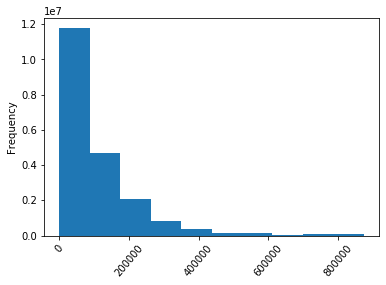

In [0]:
fig=train.square_feet.plot.hist(rot=50)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='box')` instead of `Series.plot('box',)`.
  """Entry point for launching an IPython kernel.


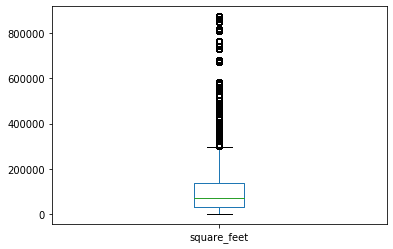

In [0]:
train.square_feet.plot('box')

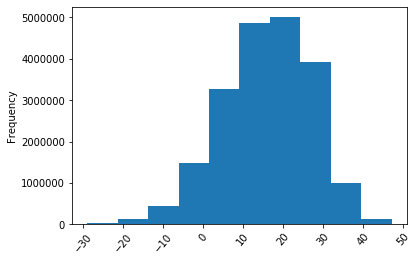

In [0]:
fig=train.air_temperature.plot.hist(rot=50)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='box')` instead of `Series.plot('box',)`.
  """Entry point for launching an IPython kernel.


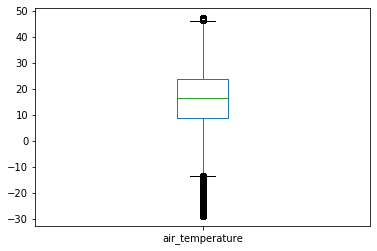

In [0]:
train.air_temperature.plot('box')

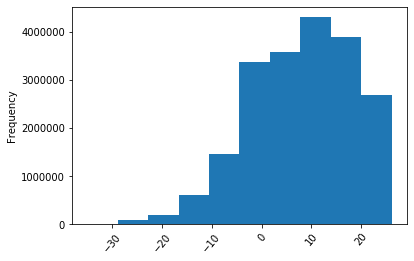

In [0]:
fig=train.dew_temperature.plot.hist(rot=50)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='box')` instead of `Series.plot('box',)`.
  """Entry point for launching an IPython kernel.


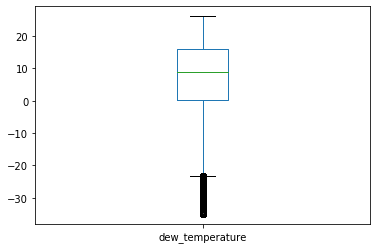

In [0]:
train.dew_temperature.plot('box')

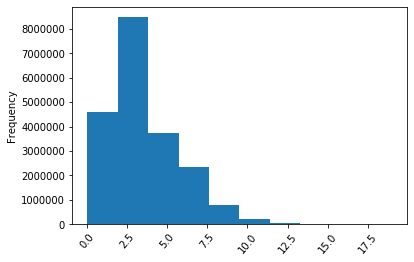

In [0]:
fig=train.wind_speed.plot.hist(rot=50)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='box')` instead of `Series.plot('box',)`.
  """Entry point for launching an IPython kernel.


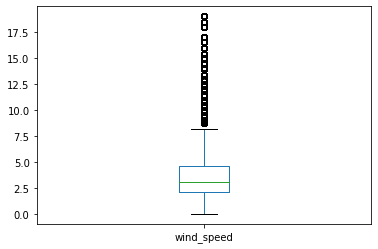

In [0]:
train.wind_speed.plot('box')

In [0]:
#log_normalization to square_feet

train['square_feet']=train['square_feet'].map(np.log)
train.head(15)



,building_id,meter,timestamp,meter_reading,square_feet,site_id,primary_use,air_temperature,dew_temperature,wind_speed
0,0,0,6010100,0.0,8.913550,0,Education,25.0,20.0,0.0
1,1,0,6010100,0.0,7.908387,0,Education,25.0,20.0,0.0
2,2,0,6010100,0.0,8.589700,0,Education,25.0,20.0,0.0
3,3,0,6010100,0.0,10.072597,0,Education,25.0,20.0,0.0
4,4,0,6010100,0.0,11.666565,0,Education,25.0,20.0,0.0
5,5,0,6010100,0.0,8.987197,0,Education,25.0,20.0,0.0
6,6,0,6010100,0.0,10.237313,0,Lodging/residential,25.0,20.0,0.0
7,7,0,6010100,0.0,11.704157,0,Education,25.0,20.0,0.0
8,8,0,6010100,0.0,11.015493,0,Education,25.0,20.0,0.0
9,9,0,6010100,0.0,10.203592,0,Office,25.0,20.0,0.0


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='box')` instead of `Series.plot('box',)`.
  """Entry point for launching an IPython kernel.


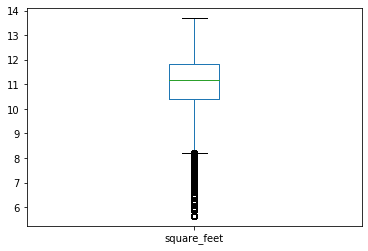

In [0]:
train.square_feet.plot('box')

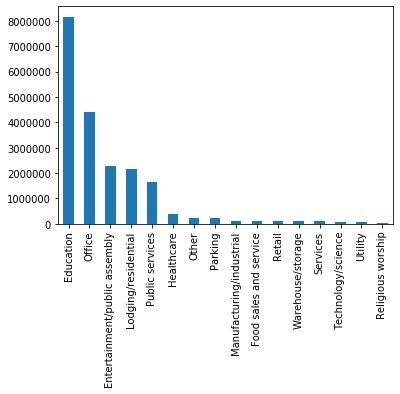

In [0]:
train.primary_use.value_counts().plot.bar()

In [0]:
# Sparse Categories 

idx = train.primary_use.isin(['Parking','Manufacturing/industrial','Food sales and service','Retail','Warehouse/storage','Services','Technology/science','Utility','Religious worship'])
train.primary_use[idx] = 'Other'

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


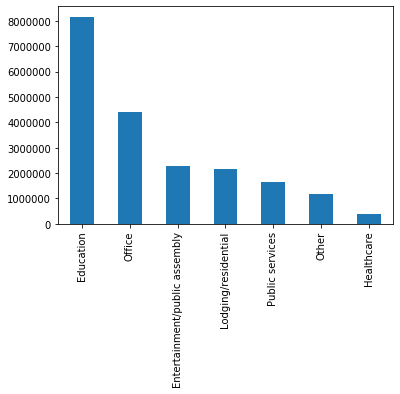

In [0]:
train.primary_use.value_counts().plot.bar()

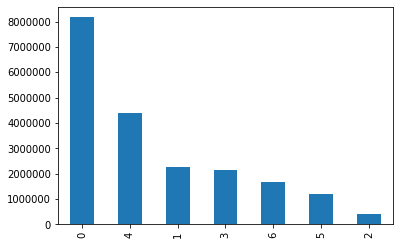

In [0]:
# Label Encoding

from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
train['primary_use'] = LE.fit_transform(train['primary_use']).astype(np.int8)

train.primary_use.value_counts().plot.bar()


In [0]:
train.isna().sum()

building_id        0
meter              0
timestamp          0
meter_reading      0
square_feet        0
site_id            0
primary_use        0
air_temperature    0
dew_temperature    0
wind_speed         0
dtype: int64

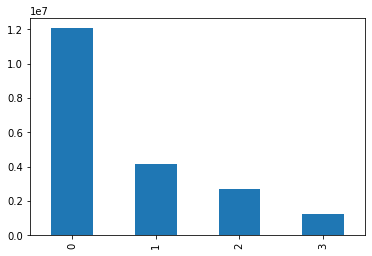

In [0]:
train.meter.value_counts().plot.bar()

In [0]:
train.describe()


,building_id,meter,timestamp,meter_reading,square_feet,site_id,primary_use,air_temperature,dew_temperature,wind_speed
count,2.021610e+07,2.021610e+07,2.021610e+07,2.021610e+07,2.021610e+07,2.021610e+07,2.021610e+07,2.021610e+07,2.021610e+07,2.021610e+07
mean,7.992780e+02,6.624412e-01,6.067372e+06,2.117121e+03,1.103941e+01,7.992232e+00,2.125675e+00,1.599084e+01,7.752852e+00,3.375552e+00
std,4.269133e+02,9.309921e-01,3.438831e+04,1.532356e+05,1.180525e+00,5.099060e+00,2.128464e+00,1.092121e+01,1.015372e+01,2.257749e+00
min,0.000000e+00,0.000000e+00,6.010100e+06,0.000000e+00,5.645447e+00,0.000000e+00,0.000000e+00,-2.890000e+01,-3.500000e+01,0.000000e+00
25%,3.930000e+02,0.000000e+00,6.040521e+06,1.830000e+01,1.038983e+01,3.000000e+00,0.000000e+00,8.900000e+00,3.000000e-01,2.100000e+00
50%,8.950000e+02,0.000000e+00,6.070417e+06,7.877500e+01,1.119422e+01,9.000000e+00,1.000000e+00,1.670000e+01,8.900000e+00,3.100000e+00
75%,1.179000e+03,1.000000e+00,6.100222e+06,2.679840e+02,1.184304e+01,1.300000e+01,4.000000e+00,2.390000e+01,1.600000e+01,4.600000e+00
max,1.448000e+03,3.000000e+00,6.123123e+06,2.190470e+07,1.368198e+01,1.500000e+01,6.000000e+00,4.720000e+01,2.610000e+01,1.900000e+01


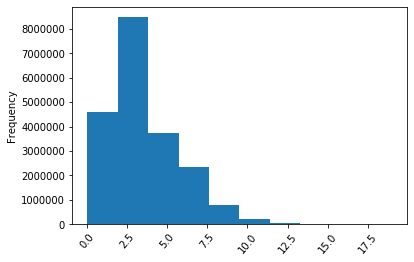

In [0]:
fig=train.wind_speed.plot.hist(rot=50)

In [0]:
#MinMax normalization ('air_temperature','dew_temperature','wind_speed')

from sklearn.preprocessing import MinMaxScaler

mmsc = MinMaxScaler()
non_skewed_vars = ['air_temperature','dew_temperature','wind_speed']
for x in non_skewed_vars:
    u = mmsc.fit_transform(train[[x]])  # this returns a 2D array with one column
    u = u.ravel()  # convert to a 1D array
    train[x] = pd.Series(u)

In [0]:
# same processing to test

test = pd.read_csv ('/content/gdrive/My Drive/ashrae-energy-prediction/test.csv')
test.head(15)

,row_id,building_id,meter,timestamp
0,0,0,0,2017-01-01 00:00:00
1,1,1,0,2017-01-01 00:00:00
2,2,2,0,2017-01-01 00:00:00
3,3,3,0,2017-01-01 00:00:00
4,4,4,0,2017-01-01 00:00:00
5,5,5,0,2017-01-01 00:00:00
6,6,6,0,2017-01-01 00:00:00
7,7,7,0,2017-01-01 00:00:00
8,8,7,1,2017-01-01 00:00:00
9,9,8,0,2017-01-01 00:00:00


In [0]:
test.shape

(41697600, 4)

In [0]:
weather_test = pd.read_csv ('/content/gdrive/My Drive/ashrae-energy-prediction/weather_test.csv')
weather_test.head(15)

,site_id,timestamp,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,0,2017-01-01 00:00:00,17.8,4.0,11.7,NaN,1021.4,100.0,3.6
1,0,2017-01-01 01:00:00,17.8,2.0,12.8,0.0,1022.0,130.0,3.1
2,0,2017-01-01 02:00:00,16.1,0.0,12.8,0.0,1021.9,140.0,3.1
3,0,2017-01-01 03:00:00,17.2,0.0,13.3,0.0,1022.2,140.0,3.1
4,0,2017-01-01 04:00:00,16.7,2.0,13.3,0.0,1022.3,130.0,2.6
5,0,2017-01-01 05:00:00,15.6,2.0,12.8,0.0,1022.1,130.0,2.1
6,0,2017-01-01 06:00:00,15.0,0.0,12.8,0.0,1021.7,150.0,1.5
7,0,2017-01-01 07:00:00,15.0,2.0,13.3,0.0,1021.6,0.0,0.0
8,0,2017-01-01 08:00:00,13.3,0.0,12.2,0.0,1021.4,0.0,0.0
9,0,2017-01-01 09:00:00,12.2,4.0,11.7,0.0,1021.4,0.0,0.0


In [0]:
weather_test.isna().sum()

site_id                    0
timestamp                  0
air_temperature          104
cloud_coverage        140448
dew_temperature          327
precip_depth_1_hr      95588
sea_level_pressure     21265
wind_direction         12370
wind_speed               460
dtype: int64

In [0]:
var_test = [x for x in weather_test.columns if x not in ['cloud_coverage','precip_depth_1_hr','sea_level_pressure','wind_direction']]
new_weather_test = weather_test[var_test]

In [0]:
new_weather_test['wind_speed'].fillna(new_weather_test['wind_speed'].median(), inplace=True)
new_weather_test['air_temperature'].fillna(new_weather_test['air_temperature'].median(), inplace=True)
new_weather_test['dew_temperature'].fillna(new_weather_test['dew_temperature'].median(), inplace=True)


/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [0]:
new_weather_test.isna().sum()

site_id            0
timestamp          0
air_temperature    0
dew_temperature    0
wind_speed         0
dtype: int64

In [0]:
test_building_id = test['building_id'].to_list()
test_square_feet = []
for i in range(len(test_building_id)):
    test_square_feet.append(new_building_metadata_square_feet[test_building_id[i]])

In [0]:
test['square_feet']=test_square_feet
test_square_feet = []
test.head()

,row_id,building_id,meter,timestamp,square_feet
0,0,0,0,2017-01-01 00:00:00,7432
1,1,1,0,2017-01-01 00:00:00,2720
2,2,2,0,2017-01-01 00:00:00,5376
3,3,3,0,2017-01-01 00:00:00,23685
4,4,4,0,2017-01-01 00:00:00,116607


In [0]:
test_site_id = []
for i in range(len(test_building_id)):
    test_site_id.append(new_building_metadata_site_id[test_building_id[i]])
test['site_id'] = test_site_id 
test_site_id = []

In [0]:
test_primary_use = []
for i in range(len(test_building_id)):
    test_primary_use.append(new_building_metadata_primary_use[test_building_id[i]])
test['primary_use']=test_primary_use
test_primary_use = []
test_building_id = []

In [0]:
new_weather_test['timestamp'] = new_weather_test['timestamp'].map(timestamp_tr)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [0]:
new_weather_test.head()

,site_id,timestamp,air_temperature,dew_temperature,wind_speed
0,0,7010100,17.8,11.7,3.6
1,0,7010101,17.8,12.8,3.1
2,0,7010102,16.1,12.8,3.1
3,0,7010103,17.2,13.3,3.1
4,0,7010104,16.7,13.3,2.6


In [0]:
test['timestamp'] = test['timestamp'].map(timestamp_tr)


In [0]:
temp_df = test[['site_id','timestamp']]
temp_df = temp_df.merge(new_weather_test, on=['site_id','timestamp'], how='left')
temp_df.shape

(41697600, 5)

In [0]:
del temp_df['site_id'],temp_df['timestamp']


In [0]:
test = pd.concat([test, temp_df], axis=1)

In [0]:
test['air_temperature'].fillna(test['air_temperature'].median(), inplace=True)
test['dew_temperature'].fillna(test['dew_temperature'].median(), inplace=True)
test['wind_speed'].fillna(test['wind_speed'].median(), inplace=True)


In [0]:
test['square_feet']=test['square_feet'].map(np.log)


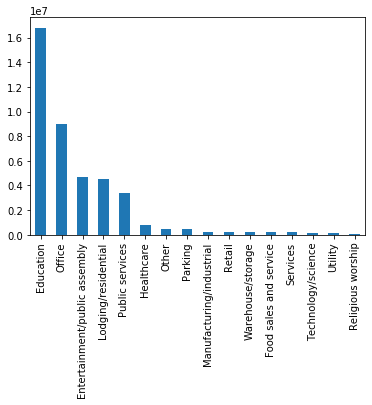

In [0]:
test.primary_use.value_counts().plot.bar()

In [0]:
idx = test.primary_use.isin(['Parking','Manufacturing/industrial','Food sales and service','Retail','Warehouse/storage','Services','Technology/science','Utility','Religious worship'])
test.primary_use[idx] = 'Other'

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


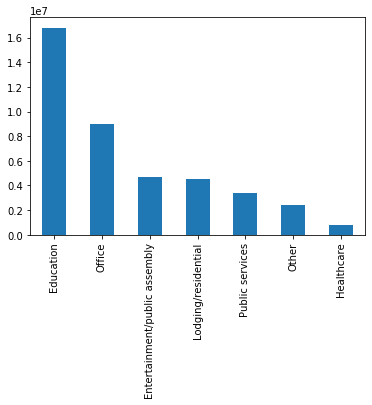

In [0]:
test.primary_use.value_counts().plot.bar()

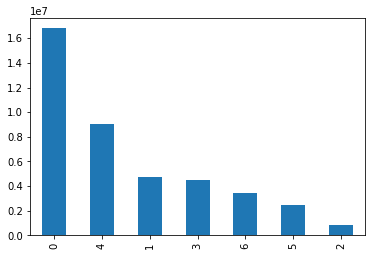

In [0]:
test['primary_use'] = LE.fit_transform(test['primary_use']).astype(np.int8)
test.primary_use.value_counts().plot.bar()

In [0]:
for x in non_skewed_vars:
    u = mmsc.fit_transform(test[[x]])  # this returns a 2D array with one column
    u = u.ravel()  # convert to a 1D array
    test[x] = pd.Series(u)

    

In [0]:
test.describe()

,row_id,building_id,meter,timestamp,square_feet,site_id,primary_use,air_temperature,dew_temperature,wind_speed
count,4.169760e+07,4.169760e+07,4.169760e+07,4.169760e+07,4.169760e+07,4.169760e+07,4.169760e+07,4.169760e+07,4.169760e+07,4.169760e+07
mean,2.084880e+07,8.075824e+02,6.642857e-01,7.566844e+06,1.103240e+01,8.086134e+00,2.125210e+00,5.708263e-01,6.722719e-01,1.398380e-01
std,1.203706e+07,4.297680e+02,9.278067e-01,5.011889e+05,1.182033e+00,5.134712e+00,2.126334e+00,1.473174e-01,1.805442e-01,9.214036e-02
min,0.000000e+00,0.000000e+00,0.000000e+00,7.010100e+06,5.645447e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.042440e+07,4.047500e+02,0.000000e+00,7.070212e+06,1.038107e+01,3.000000e+00,0.000000e+00,4.698953e-01,5.420240e-01,8.677686e-02
50%,2.084880e+07,9.000000e+02,0.000000e+00,7.566612e+06,1.118806e+01,9.000000e+00,1.000000e+00,5.863874e-01,6.946827e-01,1.280992e-01
75%,3.127320e+07,1.194250e+03,1.000000e+00,8.070211e+06,1.183781e+01,1.300000e+01,4.000000e+00,6.806283e-01,8.181818e-01,1.900826e-01
max,4.169760e+07,1.448000e+03,3.000000e+00,8.123123e+06,1.368198e+01,1.500000e+01,6.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


In [0]:
train.describe()

,building_id,meter,timestamp,meter_reading,square_feet,site_id,primary_use,air_temperature,dew_temperature,wind_speed
count,2.021610e+07,2.021610e+07,2.021610e+07,2.021610e+07,2.021610e+07,2.021610e+07,2.021610e+07,2.021610e+07,2.021610e+07,2.021610e+07
mean,7.992780e+02,6.624412e-01,6.067372e+06,2.117121e+03,1.103941e+01,7.992232e+00,2.125675e+00,5.898928e-01,6.997194e-01,1.776606e-01
std,4.269133e+02,9.309921e-01,3.438831e+04,1.532356e+05,1.180525e+00,5.099060e+00,2.128464e+00,1.435113e-01,1.661821e-01,1.188289e-01
min,0.000000e+00,0.000000e+00,6.010100e+06,0.000000e+00,5.645447e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.930000e+02,0.000000e+00,6.040521e+06,1.830000e+01,1.038983e+01,3.000000e+00,0.000000e+00,4.967148e-01,5.777414e-01,1.105263e-01
50%,8.950000e+02,0.000000e+00,6.070417e+06,7.877500e+01,1.119422e+01,9.000000e+00,1.000000e+00,5.992116e-01,7.184943e-01,1.631579e-01
75%,1.179000e+03,1.000000e+00,6.100222e+06,2.679840e+02,1.184304e+01,1.300000e+01,4.000000e+00,6.938239e-01,8.346972e-01,2.421053e-01
max,1.448000e+03,3.000000e+00,6.123123e+06,2.190470e+07,1.368198e+01,1.500000e+01,6.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


In [0]:
train = train[[x for x in train.columns if x not in ['building_id','site_id','timestamp']]]
train.describe()

,meter,meter_reading,square_feet,primary_use,air_temperature,dew_temperature,wind_speed
count,2.021610e+07,2.021610e+07,2.021610e+07,2.021610e+07,2.021610e+07,2.021610e+07,2.021610e+07
mean,6.624412e-01,2.117121e+03,1.103941e+01,2.125675e+00,5.898928e-01,6.997194e-01,1.776606e-01
std,9.309921e-01,1.532356e+05,1.180525e+00,2.128464e+00,1.435113e-01,1.661821e-01,1.188289e-01
min,0.000000e+00,0.000000e+00,5.645447e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,1.830000e+01,1.038983e+01,0.000000e+00,4.967148e-01,5.777414e-01,1.105263e-01
50%,0.000000e+00,7.877500e+01,1.119422e+01,1.000000e+00,5.992116e-01,7.184943e-01,1.631579e-01
75%,1.000000e+00,2.679840e+02,1.184304e+01,4.000000e+00,6.938239e-01,8.346972e-01,2.421053e-01
max,3.000000e+00,2.190470e+07,1.368198e+01,6.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='box')` instead of `Series.plot('box',)`.
  """Entry point for launching an IPython kernel.


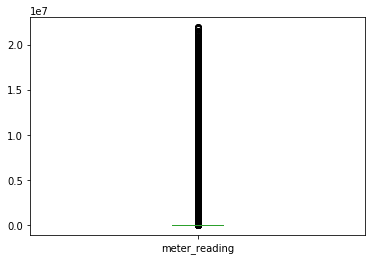

In [0]:
train.meter_reading.plot('box')

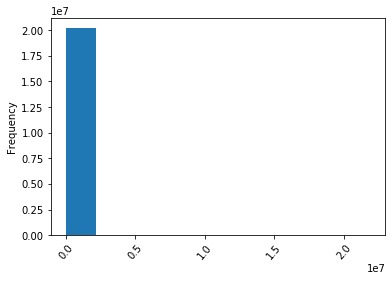

In [0]:
fig=train.meter_reading.plot.hist(rot=50)

In [0]:
#log normalization ('meter_reading')

train['meter_reading'] = train['meter_reading'] + 1
train['meter_reading'] = train['meter_reading'].map(np.log)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='box')` instead of `Series.plot('box',)`.
  """Entry point for launching an IPython kernel.


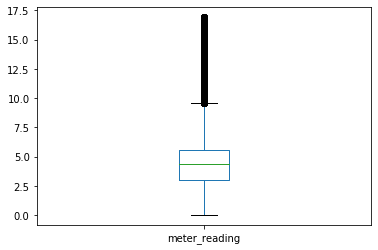

In [0]:
train.meter_reading.plot('box')

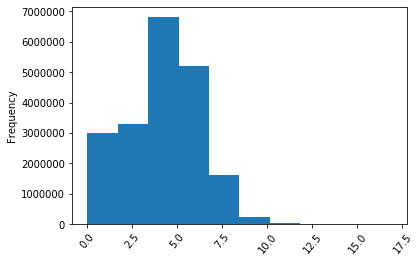

In [0]:
fig=train.meter_reading.plot.hist(rot=50)

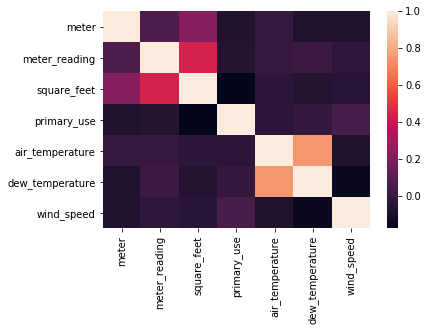

In [0]:
import seaborn as sns
C=train.corr()
sns.heatmap(C)

In [0]:
X = train[[x for x in train.columns if x not in ['meter_reading']]]
Y = train[['meter_reading']]

In [0]:
# Split the DataFrame

from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,shuffle=True)

In [0]:
X_train.head(10)

,meter,square_feet,primary_use,air_temperature,dew_temperature,wind_speed
18725907,1,12.186089,4,0.371879,0.527005,0.215789
6960477,1,12.753723,6,0.716163,0.654664,0.078947
6250941,0,10.081759,2,0.671485,0.828151,0.110526
18138488,2,10.629513,4,0.634691,0.626841,0.136842
15188575,0,8.196161,6,0.708279,0.954173,0.110526
18390976,0,9.836118,0,0.392904,0.556465,0.136842
4805674,0,10.409311,5,0.540079,0.718494,0.242105
6978632,0,12.049910,0,0.584757,0.700491,0.110526
8008907,2,10.473167,2,0.634691,0.818331,0.110526
2623108,0,10.469965,6,0.416557,0.481178,0.110526


In [0]:
X_train.to_csv(r'/content/gdrive/My Drive/ashrae-energy-prediction/X_train.csv')
X_test.to_csv(r'/content/gdrive/My Drive/ashrae-energy-prediction/X_test.csv')
Y_train.to_csv(r'/content/gdrive/My Drive/ashrae-energy-prediction/Y_train.csv')
Y_test.to_csv(r'/content/gdrive/My Drive/ashrae-energy-prediction/Y_test.csv')

In [0]:
X_train = pd.read_csv ('/content/gdrive/My Drive/ashrae-energy-prediction/X_train.csv')
X_test = pd.read_csv ('/content/gdrive/My Drive/ashrae-energy-prediction/X_test.csv')
Y_train = pd.read_csv ('/content/gdrive/My Drive/ashrae-energy-prediction/Y_train.csv')
Y_test = pd.read_csv ('/content/gdrive/My Drive/ashrae-energy-prediction/Y_test.csv')

In [0]:
X_train=X_train.drop(['Unnamed: 0'], axis=1)
Y_train = Y_train.drop(['Unnamed: 0'], axis=1)
X_test = X_test.drop(['Unnamed: 0'], axis=1)
Y_test = Y_test.drop(['Unnamed: 0'], axis=1)

In [0]:
# Convert DataFrames to Matrix
X_train = X_train.to_numpy()
Y_train = Y_train.to_numpy()
X_test = X_test.to_numpy()
Y_test = Y_test.to_numpy()

In [6]:
X_train.shape

(14151270, 6)

In [7]:
Y_train.shape

(14151270, 1)

#**Modeling**

In [8]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU
from keras.layers import Dropout

Using TensorFlow backend.


In [9]:
x=0.01
model = Sequential()
model.add(Dense(64, input_dim=6))
model.add(LeakyReLU(alpha=x))
model.add(Dense(128))
model.add(LeakyReLU(alpha=x))
model.add(Dense(256))
model.add(LeakyReLU(alpha=x))
model.add(Dense(512))
model.add(LeakyReLU(alpha=x))
model.add(Dense(512))
model.add(LeakyReLU(alpha=x))
model.add(Dense(256))
model.add(LeakyReLU(alpha=x))
model.add(Dense(128))
model.add(LeakyReLU(alpha=x))
model.add(Dense(64))
model.add(LeakyReLU(alpha=x))
model.add(Dense(1))

In [10]:
model.compile(loss='mse', optimizer='adam')

In [11]:
history = model.fit(X_train, Y_train, validation_data = (X_test,Y_test), epochs=25, batch_size=2048,shuffle=True)




Train on 14151270 samples, validate on 6064830 samples
Epoch 1/25





14151270/14151270 [==============================] - 56s 4us/step - loss: 2.8161 - val_loss: 2.6165
Epoch 2/25
14151270/14151270 [==============================] - 46s 3us/step - loss: 2.5460 - val_loss: 2.4554
Epoch 3/25
14151270/14151270 [==============================] - 46s 3us/step - loss: 2.4405 - val_loss: 2.3926
Epoch 4/25
14151270/14151270 [==============================] - 46s 3us/step - loss: 2.3621 - val_loss: 2.3354
Epoch 5/25
14151270/14151270 [==============================] - 46s 3us/step - loss: 2.3057 - val_loss: 2.2522
Epoch 6/25
14151270/14151270 [==============================] - 46s 3us/step - loss: 2.2619 - val_loss: 2.2028
Epoch 7/25
14151270/14151270 [==============================] - 46s 3us/step - loss: 2.2211 - val_loss: 2.1713
Epoch 8/25
14151270/14151270 [==============================] - 46s 3us/step - loss: 2.1924 - val_loss: 2.2070
Epoch 9/25
14151270/14151270 [===================

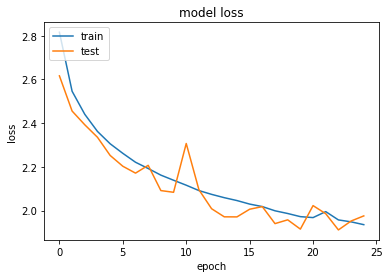

In [12]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [0]:
model.save('/content/gdrive/My Drive/ashrae-energy-prediction/Model.h5')